In [88]:
import pandas as pd

In [90]:
df = pd.read_excel('Cleaned_dataset_stability.xlsx')
print("the file is being read")

the file is being read


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   JV_reverse_scan_Voc               1356 non-null   float64
 1   JV_reverse_scan_Jsc               1356 non-null   float64
 2   JV_reverse_scan_FF                1356 non-null   float64
 3   JV_forward_scan_Voc               1356 non-null   float64
 4   JV_forward_scan_Jsc               1356 non-null   float64
 5   JV_forward_scan_FF                1356 non-null   float64
 6   JV_default_PCE                    1356 non-null   float64
 7   Stability_time_total_exposure     1356 non-null   float64
 8   Stability_PCE_end_of_experiment   1356 non-null   float64
 9   Stability_PCE_T80                 1356 non-null   float64
 10  Perovskite_composition_long_form  1356 non-null   object 
dtypes: float64(10), object(1)
memory usage: 116.7+ KB


In [94]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Perovskite_composition_long_form'], prefix='')
df_encoded.columns = df_encoded.columns.str.lstrip('_')
df_encoded

,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF,JV_default_PCE,Stability_time_total_exposure,Stability_PCE_end_of_experiment,Stability_PCE_T80,...,FA0.85MA0.15PbBr0.45I2.55,FA0.85MA0.15PbI3,FA0.9MA0.1PbBr0.3I2.7,FAMAPbI3,FAPbI3,FASnI3,MAPb0.5Sn0.5I3,MAPb1.0I3,MAPbBr3,MAPbI3
0,1.060,19.20,0.654,1.010,19.21,0.483,13.30,480.0,61.0,220.0,...,False,False,False,False,False,False,False,False,False,True
1,1.100,21.53,0.727,1.040,21.52,0.648,17.20,480.0,78.0,350.0,...,False,False,False,False,False,False,False,False,False,True
2,1.060,19.40,0.734,1.050,19.56,0.699,15.10,500.0,74.0,450.0,...,False,False,False,False,False,False,False,False,False,True
3,0.870,20.10,0.870,0.860,18.60,0.717,5.47,7.2,3.0,0.4,...,False,False,False,False,False,False,False,False,False,True
4,1.030,20.84,0.740,1.020,20.68,0.748,15.92,1008.0,71.6,840.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1.050,19.22,0.739,1.050,19.17,0.701,14.91,500.0,78.0,500.0,...,False,False,False,False,False,False,False,False,False,True
1352,1.090,20.41,0.783,1.080,20.34,0.744,17.42,500.0,78.0,500.0,...,False,False,False,False,False,False,False,False,False,True
1353,1.010,23.00,0.730,1.000,22.48,0.717,17.00,72.0,80.0,72.0,...,False,False,False,False,False,False,False,False,False,True
1354,1.120,22.25,0.760,1.096,22.30,0.760,19.01,650.0,20.0,20.0,...,True,False,False,False,False,False,False,False,False,False


In [208]:
df.columns

Index(['JV_reverse_scan_Voc', 'JV_reverse_scan_Jsc', 'JV_reverse_scan_FF',
       'JV_forward_scan_Voc', 'JV_forward_scan_Jsc', 'JV_forward_scan_FF',
       'JV_default_PCE', 'Stability_time_total_exposure',
       'Stability_PCE_end_of_experiment', 'Stability_PCE_T80',
       'Perovskite_composition_long_form'],
      dtype='object')

In [96]:
# Prepare features and target variables
X = df_encoded.drop(['Stability_PCE_T80'], axis=1)
y = df_encoded[['Stability_PCE_T80']]

In [134]:
print(X.shape, y.shape)

(1356, 34) (1356, 1)


In [100]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
print("imported")

imported


In [102]:
# Scale the features and targets
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(y)
print("scaled")

scaled


In [104]:
# First, split into training + validation (80%) and test set (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Next, split training set into actual training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42
)
print("split")

split


In [108]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor  # Use `KerasClassifier` for classification
from sklearn.model_selection import RandomizedSearchCV
print("imported")

imported


In [114]:
def create_model(
    num_layers=1,
    units=32,
    activation="relu",
    optimizer="adam",
    dropout_rate=0.2,
    learning_rate=0.001
):
    model = Sequential()
    model.add(Dense(units, input_dim=34, activation=activation))
    for _ in range(num_layers - 1):
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))
        
    # Output layer (adjust for your task: regression/classification)
    model.add(Dense(1, activation="linear"))  # Use "sigmoid" for binary classification
    
    # Configure optimizer
    if optimizer == "adam":
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        opt = RMSprop(learning_rate=learning_rate)
    # Compile the model (adjust loss/metrics for your task)
    model.compile(loss="mse", optimizer=opt, metrics=["mae"])  # Use "binary_crossentropy" for classification
    return model

model = KerasRegressor(
    model=create_model,
    verbose=0,
    # Include parameters passed to `fit()` (e.g., epochs, batch_size)
    epochs=100,
    batch_size=32
)
print("model defined")

model defined


In [116]:
param_dist = {
    "model__num_layers": [1, 2, 3],         # Number of hidden layers
    "model__units": [32, 64, 128, 256],     # Neurons per layer
    "model__activation": ["relu", "tanh"],  # Activation functions
    "model__optimizer": ["adam", "sgd"],    # Optimizers
    "model__dropout_rate": [0.2, 0.3, 0.4], # Dropout rates
    "model__learning_rate": [0.001, 0.01],  # Learning rates
    "batch_size": [16, 32, 64],             # Batch size
    "epochs": [50, 100]                     # Training epochs
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,                              # Number of hyperparameter combinations to try
    cv=3,                                   # Cross-validation folds
    scoring="neg_mean_squared_error",       # Use "accuracy" for classification
    verbose=2,
    n_jobs=-1                               # Parallelize if possible
)
print("random_search defined")

random_search defined


In [118]:
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
random_search_result = random_search.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop]
)

print("Best Hyperparameters:", random_search_result.best_params_)

best_model = random_search_result.best_estimator_.model
print("best model defined")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

Best Hyperparameters: {'model__units': 32, 'model__optimizer': 'adam', 'model__num_layers': 1, 'model__learning_rate': 0.01, 'model__dropout_rate': 0.3, 'model__activation': 'relu', 'epochs': 50, 'batch_size': 32}
best model defined


In [120]:
# Step 1: Retrieve the best hyperparameters
best_params = random_search_result.best_params_

# Step 2: Rebuild the model using the best hyperparameters
best_model = create_model(
    num_layers=best_params["model__num_layers"],
    units=best_params["model__units"],
    activation=best_params["model__activation"],
    optimizer=best_params["model__optimizer"],
    dropout_rate=best_params["model__dropout_rate"],
    learning_rate=best_params["model__learning_rate"]
)
print("best model defined")

best model defined


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
final_history = best_model.fit(
    np.concatenate((X_train, X_valid), axis=0),
    np.concatenate((y_train, y_valid), axis=0),
    epochs=best_params["epochs"],
    batch_size=best_params["batch_size"],
    callbacks=[early_stop]
)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.0935 - mae: 0.2323
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0276 - mae: 0.1211
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.0241 - mae: 0.1135
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0255 - mae: 0.1137
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0220 - mae: 0.1072
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0207 - mae: 0.1005
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.0187 - mae: 0.0953
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.0176 - mae: 0.0925
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0182 - mae: 0.0933
Epoch 10/50
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 - mae: 0.1129

/opt/anaconda3/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.0197 - mae: 0.1006
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0189 - mae: 0.0985
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0158 - mae: 0.0853
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0168 - mae: 0.0892
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0168 - mae: 0.0859
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.0195 - mae: 0.0954
Epoch 16/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.0184 - mae: 0.0938
Epoch 17/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.0144 - mae: 0.0759
Epoch 18/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.0170 - mae: 0.0868
Epoch 19/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.0168 - mae: 0.0846
Epoch 20/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0146 - mae: 0.0817
Epoch 21/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.0143 - mae: 0.0784
Epoch 22/50
34/34 ━━━━━━━━━━

In [124]:
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0245 - mae: 0.0948 
Test Loss: 0.022074444219470024, Test MAE: 0.08801992982625961


In [126]:
# Make predictions
predictions_scaled = best_model.predict(X_test)


# Inverse-transform scaled test values and the predictions
predictions_original = target_scaler.inverse_transform(predictions_scaled)
y_test_original = target_scaler.inverse_transform(y_test)


print("Original Scale Predictions:")
print(predictions_original)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Original Scale Predictions:
[[ 8.70328617e+00]
 [ 7.37958923e+02]
 [ 6.61309128e+01]
 [ 3.89120697e+02]
 [ 4.68902111e+00]
 [ 3.80587433e+02]
 [ 3.50871216e+02]
 [ 1.38558798e+01]
 [ 2.56845493e+01]
 [ 8.28461151e+01]
 [ 6.93707214e+02]
 [ 1.50167709e+02]
 [ 1.29508774e+02]
 [ 6.83348877e+02]
 [ 2.91818024e+02]
 [ 1.14919525e+02]
 [ 2.71295166e+02]
 [ 1.41181152e+02]
 [ 8.38338699e+01]
 [ 2.80927525e+01]
 [ 1.63432434e+02]
 [ 5.68481712e+01]
 [ 1.53515106e+02]
 [ 9.09295654e+00]
 [ 2.41909012e+02]
 [ 3.35830200e+02]
 [ 4.16604156e+02]
 [ 4.04993408e+02]
 [ 6.52384460e+02]
 [ 2.89828461e+02]
 [ 3.80018921e+02]
 [ 5.25549805e+02]
 [ 3.24044342e+02]
 [ 2.40678501e+01]
 [ 5.26399002e+01]
 [ 3.92626724e+01]
 [ 2.27528473e+02]
 [ 5.13713989e+02]
 [ 1.55999390e+02]
 [ 1.11021278e+02]
 [ 3.13914154e+02]
 [ 3.80264473e+00]
 [ 2.00824478e+02]
 [ 4.46824036e+01]
 [ 4.57611633e+02]
 [ 1.73454208e+02]
 [ 4.27530457e+02]
 [ 5.57087708e+01]
 [ 1.17147324e+02]
 [ 

In [128]:
# Convert to DataFrame for better readability
comparison_df = pd.DataFrame({
    'Actual (Stability_PCE_T80)': y_test_original[:, 0],
    'Predicted (Stability_PCE_T80)': predictions_original[:, 0],
   
})

print("Comparison of Actual vs Predicted Values:")
print(comparison_df)


Comparison of Actual vs Predicted Values:
     Actual (Stability_PCE_T80)  Predicted (Stability_PCE_T80)
0                           0.4                       8.703286
1                         982.0                     737.958923
2                         101.4                      66.130913
3                         383.0                     389.120697
4                           4.6                       4.689021
..                          ...                            ...
267                       432.0                     436.740784
268                       300.0                     251.072540
269                        96.0                     116.531555
270                       240.0                     140.737930
271                      1000.0                     766.421204

[272 rows x 2 columns]


MSE: 25747.6289, R2 Score: 0.6775


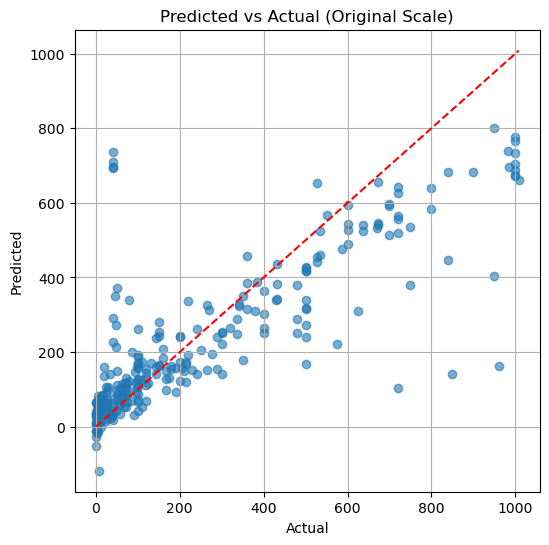

In [130]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Metrics
mse = mean_squared_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)
print(f"MSE: {mse:.4f}, R2 Score: {r2:.4f}")

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, predictions_original, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Original Scale)")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.grid(True)
plt.show()


# Implementing RF for prediction of Stability_PCE_T80

In [137]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
print("imported")

imported


In [192]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("split")

split


In [194]:
# Step 3: Define and train the Random Forest model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train.values.ravel())  # ravel() flattens y to shape (n_samples,)
print("fit")

fit


In [196]:
# Step 4: Make predictions
y_pred = model.predict(X_test)
print("prediction")

prediction


In [198]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 15203.0684
R² Score: 0.8096


In [200]:
import pandas as pd

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})

# Show first 10 rows
print(comparison_df.head(10))


   Actual   Predicted
0     0.4    0.328140
1   982.0  951.750000
2   101.4   55.334000
3   383.0   91.011000
4     4.6    4.086900
5   750.0  490.540000
6    45.0  226.904700
7     8.3    6.341000
8     0.3    0.254385
9    14.1   37.768000


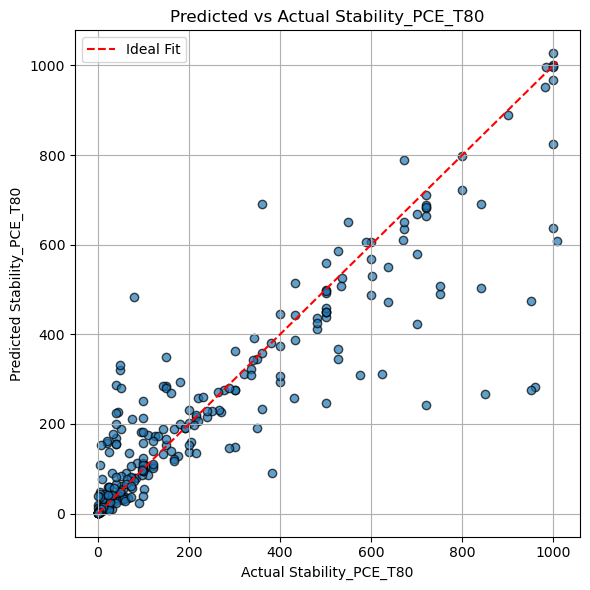

In [202]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test.values, y_pred, alpha=0.7, edgecolors='k')
plt.plot(
    [y_test.values.min(), y_test.values.max()],
    [y_test.values.min(), y_test.values.max()],
    color='red', linestyle='--', label="Ideal Fit"
)
plt.xlabel("Actual Stability_PCE_T80")
plt.ylabel("Predicted Stability_PCE_T80")
plt.title("Predicted vs Actual Stability_PCE_T80")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


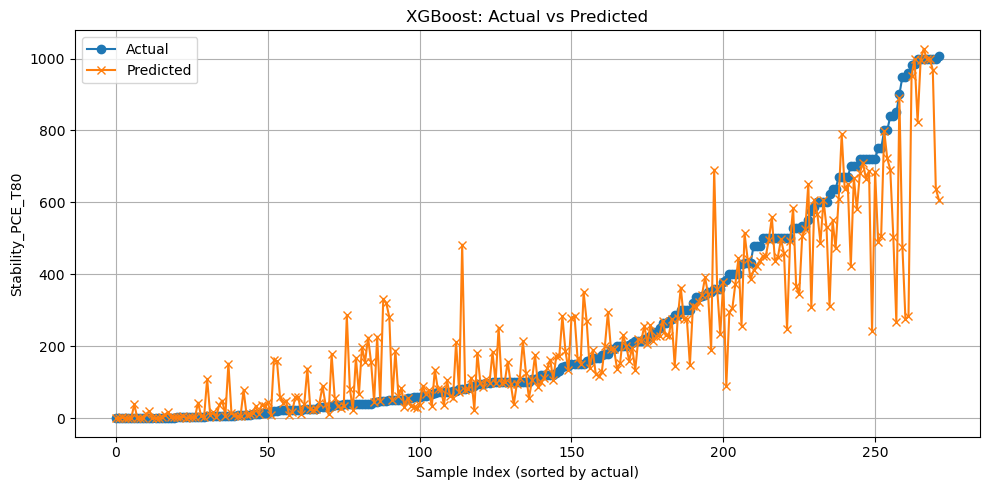

In [204]:
sorted_idx = y_test.values.flatten().argsort()

plt.figure(figsize=(10, 5))
plt.plot(y_test.values.flatten()[sorted_idx], label="Actual", marker='o')
plt.plot(y_pred.flatten()[sorted_idx], label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Stability_PCE_T80")
plt.title("XGBoost: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Implementing XGBoost for prediction of Stability_PCE_T80

In [162]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
print("import")

import


In [164]:
# Step 1: Train-Test Split (no scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("split")

split


In [166]:
# Step 2: Initialize and train XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train.values.ravel())  # .ravel() to flatten y
print("fit")

fit


In [168]:
# Step 3: Predict
y_pred = xgb_model.predict(X_test)

# Step 4: Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost R² Score: {r2:.4f}")
#print("predict")

XGBoost MSE: 16416.8722
XGBoost R² Score: 0.7944
predict


In [170]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred.flatten()
})
print(comparison_df.head(10))


   Actual   Predicted
0     0.4   -0.221278
1   982.0  932.976746
2   101.4   50.759518
3   383.0  124.641884
4     4.6    5.621680
5   750.0  587.512634
6    45.0  250.578278
7     8.3    8.552329
8     0.3    2.033457
9    14.1   54.983849


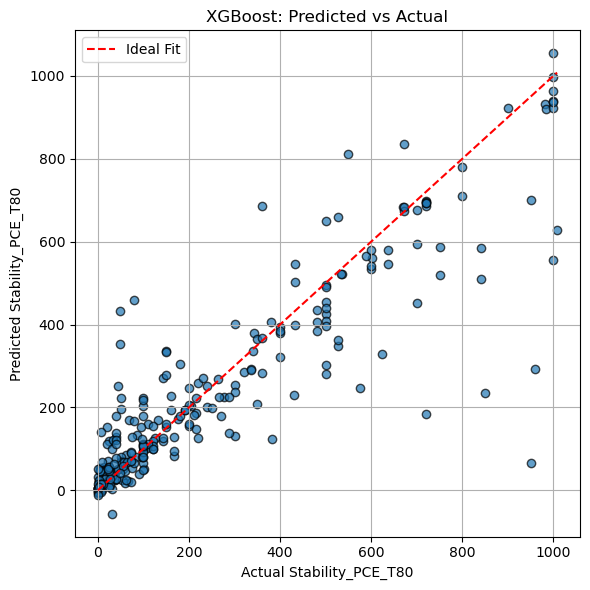

In [172]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test.values, y_pred, alpha=0.7, edgecolors='k')
plt.plot(
    [y_test.values.min(), y_test.values.max()],
    [y_test.values.min(), y_test.values.max()],
    color='red', linestyle='--', label="Ideal Fit"
)
plt.xlabel("Actual Stability_PCE_T80")
plt.ylabel("Predicted Stability_PCE_T80")
plt.title("XGBoost: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


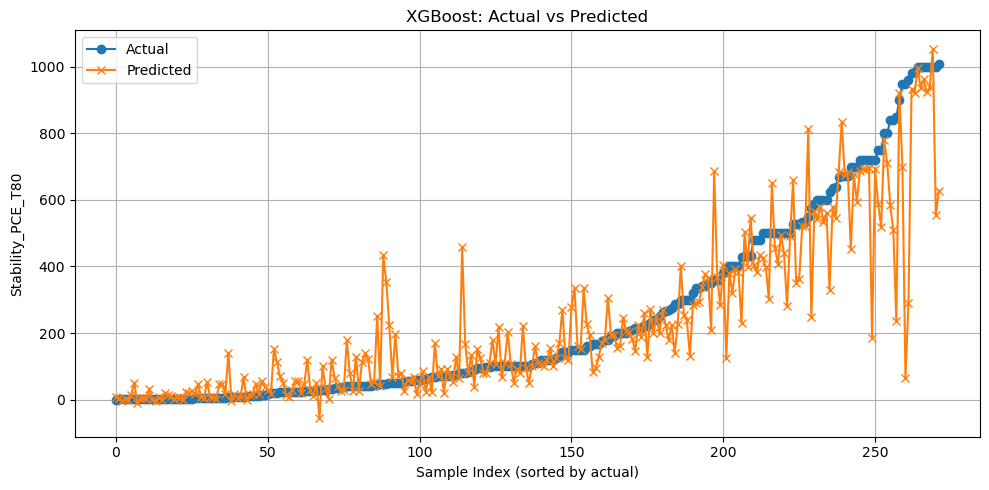

In [174]:
sorted_idx = y_test.values.flatten().argsort()

plt.figure(figsize=(10, 5))
plt.plot(y_test.values.flatten()[sorted_idx], label="Actual", marker='o')
plt.plot(y_pred.flatten()[sorted_idx], label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Stability_PCE_T80")
plt.title("XGBoost: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
